# <a id="#">Task 3 – Mean, median, and Gaussian filtering</a>

In [5]:
import numpy
import matplotlib.pyplot as plt


---

## Linear filtering by convolution (mean filter)

**<a id="#">Task 3.1.1.</a>** Load the image `data/astronaut.png` and show it:

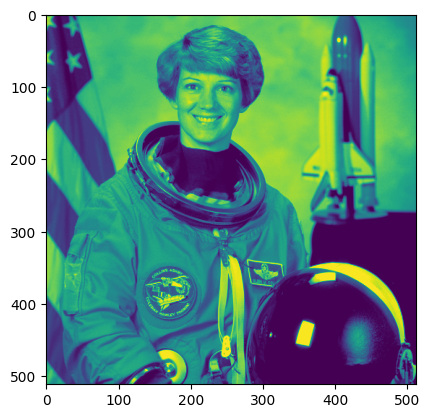

In [6]:
img = plt.imread('data/astronaut.png')
plt.imshow(img)
plt.show()

**<a id="#">Task 3.1.2.</a>** Implement a mean filter:

In [ ]:
def meanfilter(img_in, size):
    height, width = img_in.shape

    result = numpy.zeros((height, width))

    n = (size - 1) // 2
    for p in numpy.ndindex(img_in.shape):
        if n <= p[0] < img_in.shape[0] - n and n <= p[1] < img_in.shape[1] - n:
            neighborhood_sum = 0
            for q in numpy.ndindex(size, size):
                neighbor_y = p[0] + q[0] - n
                neighbor_x = p[1] + q[1] - n 
                neighborhood_sum += img_in[neighbor_y, neighbor_x]
            result[p] = neighborhood_sum/(size*size)
    return result

**<a id="#">Task 3.1.3.</a>** Test your implementation from above by using the function `meanfilter` for the previously loaded image and show the result:

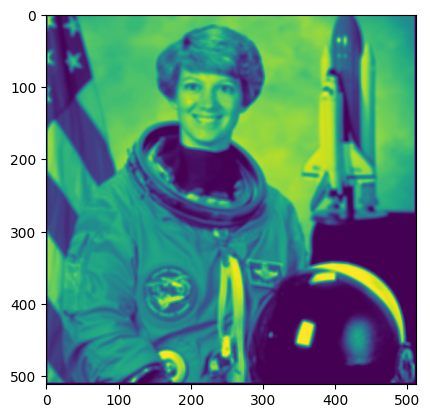

In [8]:

filtered_img = meanfilter(img, 5)
plt.imshow(filtered_img)
plt.show()




**<a id="#">Task 3.1.4.</a>** Compare your result for filter size `5` with the correct result image `data/astronaut_meanfilter5.png`:

In [9]:
img_correct = plt.imread('data/astronaut_meanfilter5.png')

assert numpy.allclose(filtered_img, img_correct, atol = 1/255)

---

## Non-linear filtering

**<a id="#">Task 3.2.1.</a>** Implement a median filter:

In [14]:
def medianfilter(img_in, size):
    result = numpy.zeros(img_in.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img_in.shape):
        if n <= p[0] < img_in.shape[0] - n and n <= p[1] < img_in.shape[1] - n:
            values = []
            for q in numpy.ndindex(size, size):
                neighbor_y = p[0] + q[0] - n
                neighbor_x = p[1] + q[1] - n 
                pixel = img_in[neighbor_y, neighbor_x]
                values.append(pixel)
            values.sort()
            result[p] = values[len(values) // 2]
    
    return result

**<a id="#">Task 3.2.2.</a>** First, test your implementation from above by using the function `medianfilter` for the previously loaded image and show the result:

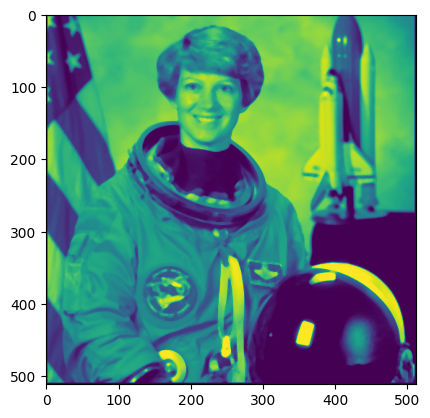

In [18]:
medfiltered_img = medianfilter(img, 5)
plt.imshow(medfiltered_img)
plt.show()


Then, compare your result for filter size `5` with the correct result image `data/astronaut_medianfilter5.png`:

In [19]:
og_medfilter = plt.imread('data/astronaut_medianfilter5.png')
assert numpy.allclose(medfiltered_img, og_medfilter, atol = 1/255)

---

## Using pre-implemented filters

**<a id="#">Task 3.3.1.</a>** Load the package `scipy.ndimage`:

In [20]:
import scipy.ndimage

**<a id="#">Task 3.3.2 (a).</a>** Apply a **mean filter** from `scipy.ndimage` to the loaded image:

In [27]:
scipy_mean = scipy.ndimage.uniform_filter(img, 5)

**<a id="#">Task 3.3.2 (b).</a>** Apply a **median filter** from `scipy.ndimage` to the loaded image:

In [28]:
scipy_median = scipy.ndimage.median_filter(img, 5)

**<a id="#">Task 3.3.2 (c).</a>** Apply a **Gaussian filter** from `scipy.ndimage` to the loaded image:

In [29]:
scipy_gaussian = scipy.ndimage.gaussian_filter(img, 1.2)

**<a id="#">Task 3.3.3.</a>** Compare the results obtained using the functions from `scipy.ndimage` with those you obtained using your own implementations. What are the main differences? Do you have an explanation?

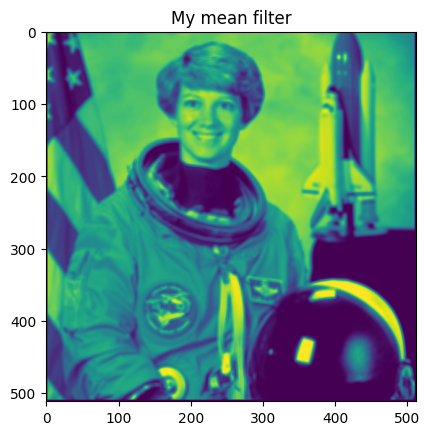

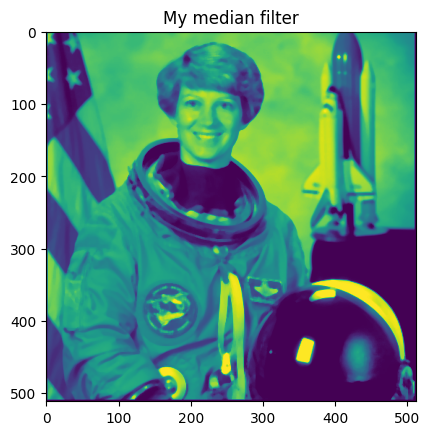

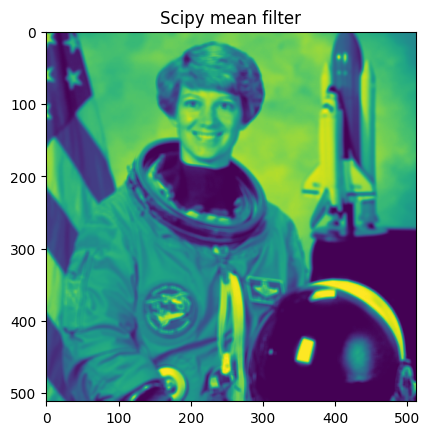

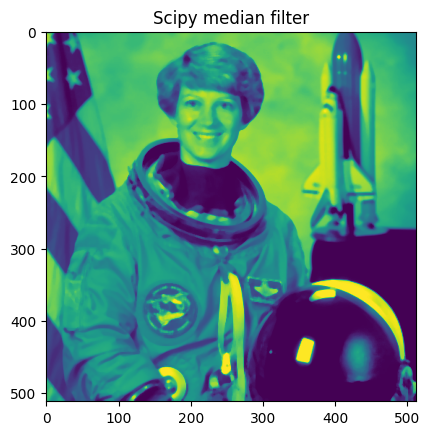

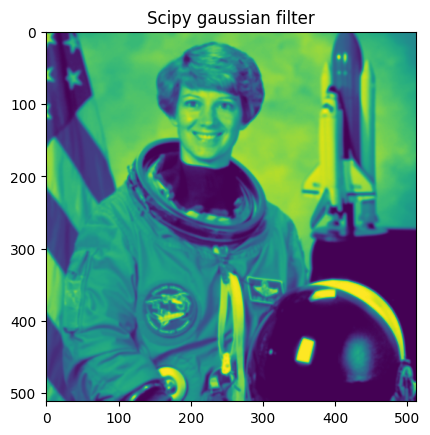

In [30]:
plt.imshow(filtered_img)
plt.title('My mean filter')
plt.show()

plt.imshow(medfiltered_img)
plt.title('My median filter')
plt.show()

plt.imshow(scipy_mean)
plt.title('Scipy mean filter')
plt.show()

plt.imshow(scipy_median)
plt.title('Scipy median filter')
plt.show()

plt.imshow(scipy_gaussian)
plt.title('Scipy gaussian filter')
plt.show()



---

## Slicing and benchmarking

**<a id="#">Task 3.4.2.</a>** Implement either a mean filter or a median filter using only a single `for`-loop:

In [ ]:
def fastfilter(img_in, size):
    ...

**<a id="#">Task 3.4.3.</a>** First, test your implementation from above by using the function `fastfilter` for the previously loaded image and show the result:

Then, compare your result to those obtained using your implementation for either `meanfilter` or `medianfilter`, respectively:

**<a id="#">Task 3.4.4.</a>** Benchmark the code run times:

**<a id="#">Task 3.4.5.</a>** Document your observations regarding the benchmarking results and try to think of an explanation: